# Basic Setup

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!unzip 'drive/My Drive/MLNLP/Assignment1/a1_data.zip' -d 'drive/My Drive/MLNLP/Assignment1/'

Archive:  drive/My Drive/MLNLP/Assignment1/a1_data.zip
replace drive/My Drive/MLNLP/Assignment1/a1_data/europarl.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [24]:
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
import numpy as np
import spacy
from pyinflect import getAllInflections

Class Corpus

In [25]:
class Corpus:

    def __init__(self, filePath, encoding):
        self.wordCounter = Counter()
        fileHandler = open(filePath, encoding=encoding)
        with fileHandler:
            for line in fileHandler:
                tokens = line.lower().split()
                self.wordCounter.update(tokens)
        fileHandler.close()

    def most_common_word(self, numOfMostCommonWords, needToStore):
        if needToStore == 'Y':
            self.corpusMostCommonWords = Counter(self.wordCounter).most_common(numOfMostCommonWords)
        elif needToStore == 'N':
            print(Counter(self.wordCounter).most_common(numOfMostCommonWords))

    def most_common_word_following(self, filePath, encoding, followingWhichWord, numOfMostCommonWords):
        wordPairCounter = defaultdict(Counter)
        fileHandler = open(filePath, encoding=encoding)
        with fileHandler:
            for line in fileHandler:
                tokens = line.lower().split()
                for t1, t2 in zip(tokens, tokens[1:]):
                    wordPairCounter[t1][t2] += 1
        print(Counter(wordPairCounter[followingWhichWord]).most_common(numOfMostCommonWords))
        wordPairCounter.clear()
        fileHandler.close()

In [26]:
filePath = list()
filePath.append("/content/drive/My Drive/MLNLP/Assignment1/a1_data/books.txt")
filePath.append("/content/drive/My Drive/MLNLP/Assignment1/a1_data/europarl.txt")
filePath.append("/content/drive/My Drive/MLNLP/Assignment1/a1_data/wikipedia.txt")

fileEncoding = list()
fileEncoding.append("ISO-8859-1")
fileEncoding.append("UTF-8")
fileEncoding.append("UTF-8")


# Computing word frequencies

In [27]:
numOfMostCommonWords = 10

books = Corpus(filePath[0], fileEncoding[0])
euroParl = Corpus(filePath[1], fileEncoding[1])
wikipedia = Corpus(filePath[2], fileEncoding[2])

books.most_common_word(numOfMostCommonWords, 'N')
euroParl.most_common_word(numOfMostCommonWords, 'N')
wikipedia.most_common_word(numOfMostCommonWords, 'N')

[('the', 2425678), (',', 2064433), ('.', 1958494), ('and', 1367843), ('of', 1321821), ('to', 1159024), ('a', 1103939), ('is', 792900), ('in', 739009), ('i', 704436)]
[('the', 3003965), (',', 2115604), ('.', 1536632), ('of', 1422333), ('to', 1341441), ('and', 1158234), ('in', 945160), ('that', 732156), ('a', 674231), ('is', 671969)]
[('the', 3158463), (',', 2566261), ('.', 1956600), ('of', 1534698), ('and', 1260516), ('in', 1205759), ('a', 958283), ('to', 926287), ('-', 548244), ('is', 522101)]


The 10 most common words in the three corpus are:

Books | Euro Parl | Wikipedia
--- | --- | --- 
the      |      the     |           the   
,        |      ,        |          ,                  
.         |     .        |          .                  
and       |      of        |        of                 
of        |      to         |       and                
to        |      and         |       in                 
a         |     in            |     a                  
is        |     that          |    to                 
in        |     a            |     -                 
i         |     is           |      is               

In [28]:
books.most_common_word_following(filePath[0], fileEncoding[0], 'red', numOfMostCommonWords)
euroParl.most_common_word_following(filePath[1], fileEncoding[1], 'red', numOfMostCommonWords)
wikipedia.most_common_word_following(filePath[2], fileEncoding[2], 'red', numOfMostCommonWords)

[('sox', 198), ('herrings', 175), (',', 132), ('army', 126), ('and', 104), ('riding', 83), ('wine', 75), ('october', 69), ('cross', 65), ('"', 65)]
[('tape', 856), ('cross', 214), ('card', 54), ('lines', 37), ('and', 26), ('army', 26), ('light', 25), ('line', 23), (',', 22), ('.', 18)]
[(',', 532), ('sox', 495), ('and', 467), ('-', 454), ('army', 404), ('cross', 278), ('.', 213), ('wings', 208), ('sea', 177), ('river', 166)]


The 10 most occurring words in the three corpus following the word red are:


Books | Euro Parl | Wikipedia
--- | --- | --- 
sox      |      tape     |           ,   
herrings        |      cross        |          sox
,         |     card        |          and              
army       |      lines        |        -              
and       |      and         |       army
riding        |      army         |       cross                 
wine       |     light           |     .
october        |     line          |    wings              
cross        |     ,           |    sea
"         |     .           |      river   

# Investigating the word frequencies

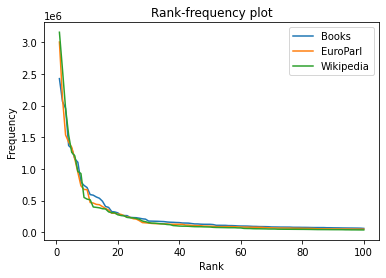

<Figure size 432x288 with 0 Axes>

In [29]:
numOfMostCommonWords = 100

books.most_common_word(numOfMostCommonWords, 'Y')
euroParl.most_common_word(numOfMostCommonWords, 'Y')
wikipedia.most_common_word(numOfMostCommonWords, 'Y')

plotFrame = np.zeros((4, numOfMostCommonWords))
plotFrame[0] = np.arange(1, 101, 1)
for iWord in range(numOfMostCommonWords):
    plotFrame[1][iWord] = books.corpusMostCommonWords[iWord][1]
    plotFrame[2][iWord] = euroParl.corpusMostCommonWords[iWord][1]
    plotFrame[3][iWord] = wikipedia.corpusMostCommonWords[iWord][1]

plt.figure(1)
plt.plot(plotFrame[0], plotFrame[1], label="Books")
plt.plot(plotFrame[0], plotFrame[2], label="EuroParl")
plt.plot(plotFrame[0], plotFrame[3], label="Wikipedia")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.legend()
plt.title("Rank-frequency plot")
plt.show()
plt.savefig('drive/My Drive/MLNLP/Assignment1/rank_freq_plot.png')


The rank-frequency plot for when 100 most common words in each corpus were used is shown here.

We can see from the plot that there are few words especially the 20 highest ranked words that occur predominantly in the corpus. The most common words are generally short and usually grammatical in type. They can be said as most generic words along with symbols like dots, comma's etc. The Word "the" is unsurprisingly the rank 1 word.

Another key observation is that this extremely skewed distribution of words can cause problems in training a network. The lowest ranked words are so rare that there won't be sufficient occurrences to train them. Adding more and more corpus may lead to overfitting of most commonly occurred word. 

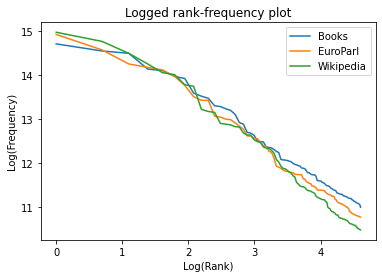

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(2)
plt.plot(np.log(plotFrame[0]), np.log(plotFrame[1]), label="Books")
plt.plot(np.log(plotFrame[0]), np.log(plotFrame[2]), label="EuroParl")
plt.plot(np.log(plotFrame[0]), np.log(plotFrame[3]), label="Wikipedia")
plt.xlabel("Log(Rank)")
plt.ylabel("Log(Frequency)")
plt.legend()
plt.title("Logged rank-frequency plot")
plt.show()
plt.savefig('drive/My Drive/MLNLP/Assignment1/logged_rank_freq_plot.png')

The logged rank-frequency plot for 100 most common words is shown here.

The observed distribution is well aligned with the Zipf's law. According to Zipf's law, the frequency of observation is inversely proportional to it's rank. Or we can also that the most frequent word of a corpus will occur about twice as often as the second most frequent word, three times more often as the third most frequent word and so on. This should then follow the exponential function $2^n$, which can be observed from the first plot above.

Generally, $frequency \propto \frac{Constant}{rank}$ and taking the logarithm on both sides leads to a linear equation with negative slope i.e. $ln(freq) = -ln(rank) + constant$ which is a linear expression. The plot for all three corpus clearly follows the Zipf's statement as we can see roughly a linear pattern with negative slope. 

# Comparing Corpora

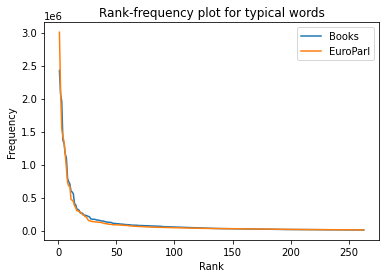

<Figure size 432x288 with 0 Axes>

In [34]:
numOfMostCommonWords = 500
books.most_common_word(numOfMostCommonWords, 'Y')
euroParl.most_common_word(numOfMostCommonWords, 'Y')
wikipedia.most_common_word(numOfMostCommonWords, 'Y')

wordsFrame = list()
for iFrame in range(3):
    wordsFrame.append(list())

for iWord in range(numOfMostCommonWords):
    wordsFrame[0].append(books.corpusMostCommonWords[iWord][0])
    wordsFrame[1].append(euroParl.corpusMostCommonWords[iWord][0])
    wordsFrame[2].append(wikipedia.corpusMostCommonWords[iWord][0])

# Comparing books and europarl

typicalWordsFrame = list()
for iWord in range(numOfMostCommonWords):
    for jWord in range(numOfMostCommonWords):
        if wordsFrame[0][iWord] == wordsFrame[1][jWord]:
            iWordFreq = books.corpusMostCommonWords[iWord][1]
            jWordFreq = euroParl.corpusMostCommonWords[iWord][1]
            typicalWordsFrame.append((wordsFrame[0][iWord], iWordFreq, jWordFreq, iWordFreq + jWordFreq))

typicalWordsFrame = sorted(typicalWordsFrame, key=lambda tup: tup[3], reverse=True)

plotTypicalWords = np.zeros((3, len(typicalWordsFrame)))
plotTypicalWords[0] = np.arange(1, len(typicalWordsFrame) + 1, 1)
for iWord in range(len(typicalWordsFrame)):
    plotTypicalWords[1][iWord] = typicalWordsFrame[iWord][1]
    plotTypicalWords[2][iWord] = typicalWordsFrame[iWord][2]

plt.figure(3)
plt.plot(plotTypicalWords[0], plotTypicalWords[1], label="Books")
plt.plot(plotTypicalWords[0], plotTypicalWords[2], label="EuroParl")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.legend()
plt.title("Rank-frequency plot for typical words")
plt.show()
plt.savefig('drive/My Drive/MLNLP/Assignment1/comparingCorpora_1.png')


The typical word can be assumed as the words that occur most frequently on both corpus. As we proved from Zipf's law that the frequency of word is inversely proportional to rank, we can say that for rank 500, the frequency can be roughly $2425678/500 \approx 5000 \approx 0.2\%$ of rank 1 frequency. And hence, we can say that typical words will be under the top 500 ranked words of both corpus. 

Among the top 500 common words, there were around 260 mutual words and the frequency plot for the mutual words is shown here. 



From the rank-frequency plot of typical words shown above it is evident that most of the high ranked words are same in either corpus as the typical word distribution is roughly same for both corpus.

No handles with labels found to put in legend.


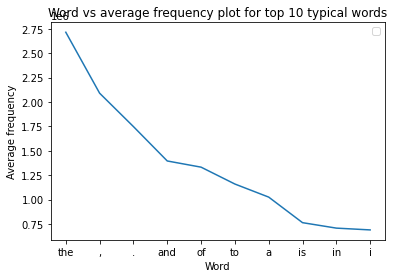

In [ ]:
plt.figure(4)
plt.plot([typicalWordsFrame[iWord][0] for iWord in range(10)], [typicalWordsFrame[iWord][3] / 2 for iWord in range(10)])
plt.xlabel("Word")
plt.ylabel("Average frequency")
plt.title("Word vs average frequency plot for top 10 typical words")
plt.show()
plt.savefig('drive/My Drive/MLNLP/Assignment1/comparingCorpora_2.png')

The top 10 typical words is shown in the below plot. The ranking is decided based upon the average frequency of word from both corpus. Again unsurprisingly, the top 10 typical words belongs to the grammar. 

# Comparing corpora - Another approach

In [38]:
from collections import Counter
def most_frequent(file, encoding, n):
    freqs = Counter()
    with open(file, encoding=encoding) as f:
        for line in f:
            tokens = line.lower().split()
            for token in tokens:
                freqs[token] += 1
    if n == -1:
        return freqs, freqs.most_common()
    else:
        return freqs.most_common(n)

In [40]:
f1, most_frequent_europarl = most_frequent(filePath[1], fileEncoding[1], -1)

In [41]:
f2, most_frequent_books = most_frequent(filePath[0], fileEncoding[0], -1)

In [42]:
most_frequent_books[0]

('the', 2425678)

In [43]:
# Define what we mean by typical. I.e., it is typical in the European Parliament corpus
# if a word appears more than 5000 times in the European Parliament corpus but less than
# 500 times in the book corpus and vice versa. These paramters could be adjusted accordingly.
common = 5000
uncommon = 500

In [44]:
typical_words_europarl = []
for x in most_frequent_europarl:
    if x[1] > common and f2[x[0]] < uncommon:
        typical_words_europarl.append(x[0])

In [45]:
typical_words_europarl[0:15]

['commission',
 'parliament',
 'eu',
 '``',
 "''",
 'committee',
 'commissioner',
 'proposal',
 'directive',
 'cooperation',
 '%',
 'mrs',
 'treaty',
 '___langcode___',
 'rapporteur']

In [46]:
typical_words_books = []
for x in most_frequent_books:
    if x[1] > common and f1[x[0]] < uncommon:
        typical_words_books.append(x[0])

In [47]:
typical_words_books[0:20]

['"',
 "n't",
 '-',
 'books',
 'novel',
 'characters',
 '/',
 'reader',
 "'ve",
 'stories',
 "'m",
 'pages',
 "'re",
 "'ll",
 'ca',
 'page',
 'readers',
 'style',
 'plot',
 'fun']

## Side show: preprocessing text for machine learning

In [48]:
import numpy as np
class Vocab:
    def __init__(self, max_voc_size, batch_size):
        self.max_voc_size = max_voc_size
        self.batch_size = batch_size
        self.vocabulary = {}
    
    def build_vocab(self, f):
        freqs = Counter()
        for line in f:
            tokens = line.lower().split()
            for token in tokens:
                freqs[token] += 1
        most_frequent_words = freqs.most_common(self.max_voc_size)
        i = 1
        for word in most_frequent_words:
            self.vocabulary[word[0]] = i 
            i = i + 1
            
    def batches(self, f):
        batch = []
        max_length = 0
        i = 0
        while True:
            line = f.readline()
            sentence = []
            tokens = line.lower().split()
            for token in tokens:
                if token in self.vocabulary:
                    sentence.append(self.vocabulary[token])
                else:
                    sentence.append("<OTHER>")
            if len(sentence) > max_length:
                max_length = len(sentence)
            batch.append(sentence)
            i = i + 1
            if i == self.batch_size or not line.endswith('\n'):
                for s in batch:
                    if len(s) < max_length:
                        for i in range(0,max_length-len(s)):
                            s.append("<PADDING>")
                max_length = 0
                i = 0
                yield np.array(batch).T
                batch = []
                if not line.endswith('\n'):
                    break

In [49]:
dataset = filePath[2]

with open(dataset) as f:
    voc = Vocab(max_voc_size=1000, batch_size=8)

    # go through the lines and build the vocabulary
    voc.build_vocab(f)
    

In [ ]:
#voc.vocabulary

In [50]:
with open(dataset) as f:
    for b in voc.batches(f):
        # b is a matrix of shape (max_length, batch_size)
        # where max_length is the length of the longest
        # line in the batch
        print(b.shape)

Streaming output truncated to the last 5000 lines.
(81, 8)
(22, 8)
(48, 8)
(47, 8)
(36, 8)
(28, 8)
(41, 8)
(22, 8)
(48, 8)
(35, 8)
(44, 8)
(42, 8)
(53, 8)
(51, 8)
(43, 8)
(36, 8)
(44, 8)
(36, 8)
(28, 8)
(67, 8)
(38, 8)
(39, 8)
(47, 8)
(50, 8)
(44, 8)
(45, 8)
(35, 8)
(68, 8)
(26, 8)
(44, 8)
(46, 8)
(41, 8)
(43, 8)
(45, 8)
(52, 8)
(32, 8)
(31, 8)
(48, 8)
(28, 8)
(33, 8)
(55, 8)
(50, 8)
(52, 8)
(32, 8)
(53, 8)
(51, 8)
(123, 8)
(55, 8)
(37, 8)
(57, 8)
(45, 8)
(86, 8)
(61, 8)
(25, 8)
(34, 8)
(39, 8)
(50, 8)
(169, 8)
(42, 8)
(47, 8)
(50, 8)
(42, 8)
(75, 8)
(26, 8)
(71, 8)
(44, 8)
(26, 8)
(30, 8)
(31, 8)
(49, 8)
(45, 8)
(42, 8)
(49, 8)
(50, 8)
(48, 8)
(50, 8)
(46, 8)
(29, 8)
(33, 8)
(36, 8)
(47, 8)
(26, 8)
(48, 8)
(42, 8)
(38, 8)
(83, 8)
(37, 8)
(42, 8)
(35, 8)
(52, 8)
(29, 8)
(37, 8)
(40, 8)
(30, 8)
(44, 8)
(46, 8)
(38, 8)
(45, 8)
(71, 8)
(25, 8)
(27, 8)
(52, 8)
(27, 8)
(111, 8)
(33, 8)
(69, 8)
(56, 8)
(46, 8)
(33, 8)
(34, 8)
(52, 8)
(47, 8)
(110, 8)
(56, 8)
(40, 8)
(49, 8)
(23, 8)
(88, 8)
(

## Trying out an NLP toolkit


In [51]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [52]:
example = 'ASDF Inc. bought two companies last week. One of them was founded by Jane XYZ in 2012 in Germany.'
#example = "I like to drink milk." 
result = nlp(example)

In [53]:
spacy.displacy.render(result, style='ent', jupyter=True)

In [54]:
for token in result:
   # if token.pos_ == "NOUN":
    print(token.text,"\t|\t",token.pos_,"\t|\t", token.lemma_, "\t|\t",token.head,"\t|\t", token.dep_,"\t|\t", token.dep_)

ASDF 	|	 PROPN 	|	 ASDF 	|	 Inc. 	|	 compound 	|	 compound
Inc. 	|	 PROPN 	|	 Inc. 	|	 bought 	|	 nsubj 	|	 nsubj
bought 	|	 VERB 	|	 buy 	|	 bought 	|	 ROOT 	|	 ROOT
two 	|	 NUM 	|	 two 	|	 companies 	|	 nummod 	|	 nummod
companies 	|	 NOUN 	|	 company 	|	 bought 	|	 dobj 	|	 dobj
last 	|	 ADJ 	|	 last 	|	 week 	|	 amod 	|	 amod
week 	|	 NOUN 	|	 week 	|	 bought 	|	 npadvmod 	|	 npadvmod
. 	|	 PUNCT 	|	 . 	|	 bought 	|	 punct 	|	 punct
One 	|	 NUM 	|	 one 	|	 founded 	|	 nsubjpass 	|	 nsubjpass
of 	|	 ADP 	|	 of 	|	 One 	|	 prep 	|	 prep
them 	|	 PRON 	|	 -PRON- 	|	 of 	|	 pobj 	|	 pobj
was 	|	 AUX 	|	 be 	|	 founded 	|	 auxpass 	|	 auxpass
founded 	|	 VERB 	|	 found 	|	 founded 	|	 ROOT 	|	 ROOT
by 	|	 ADP 	|	 by 	|	 founded 	|	 agent 	|	 agent
Jane 	|	 PROPN 	|	 Jane 	|	 XYZ 	|	 compound 	|	 compound
XYZ 	|	 PROPN 	|	 XYZ 	|	 by 	|	 pobj 	|	 pobj
in 	|	 ADP 	|	 in 	|	 founded 	|	 prep 	|	 prep
2012 	|	 NUM 	|	 2012 	|	 in 	|	 pobj 	|	 pobj
in 	|	 ADP 	|	 in 	|	 founded 	|	 prep 	|	 

In [55]:
for entity in result.ents:
    print(entity.text)
    print(entity.label_)
    print("\n")

ASDF Inc.
ORG


two
CARDINAL


last week
DATE


One
CARDINAL


Jane XYZ
PERSON


2012
DATE


Germany
GPE




## Additional questions

#### Which are the most frequent nouns in the book review corpus?

In [57]:
from collections import Counter
with open(filePath[0], encoding=fileEncoding[0]) as f:
    books = f.read()[0:1000000]

In [58]:
result = nlp(books)

In [59]:
noun_frequency = Counter()
for token in result:
    if token.pos_ == "NOUN":
        noun_frequency[token.text] += 1

In [60]:
noun_frequency.most_common(10)

[('book', 2137),
 ('time', 345),
 ('story', 339),
 ('life', 311),
 ('books', 300),
 ('people', 292),
 ('way', 222),
 ('world', 221),
 ('author', 190),
 ('novel', 180)]

#### Which are the most frequently mentioned countries in the Wikipedia corpus?

In [61]:
from collections import Counter
with open(filePath[2], encoding=fileEncoding[2]) as f:
    wiki = f.read()[0:1000000]

In [62]:
result = nlp(wiki)

In [63]:
country_frequency = Counter()
for entity in result.ents:
    if entity.label_ == "GPE":
        country_frequency[entity.text] += 1

In [64]:
country_frequency.most_common(10)

[('the United States', 43),
 ('New York', 34),
 ('U.S.', 34),
 ('Germany', 32),
 ('Canada', 31),
 ('England', 30),
 ('Japan', 28),
 ('France', 27),
 ('Washington', 27),
 ('Appleton', 27)]

#### What are the most frequent items that people drink in the European Parliament corpus?

In [65]:
drink_frequencies = Counter()
drink_forms = ["drink", "drinks", "drinking", "drank"]
with open(filePath[1], encoding=fileEncoding[1]) as f:
    for line in f:
        tokens = line.lower().split()
        if not set(drink_forms).isdisjoint(tokens):
            result = nlp(line)
            for token in result:
                if (token.pos_ == "NOUN" and token.head.lemma_ in drink_forms):
                    drink_frequencies[token.text] += 1

In [66]:
drink_frequencies.most_common(10)

[('water', 69),
 ('spirit', 39),
 ('milk', 26),
 ('alcohol', 20),
 ('wine', 18),
 ('energy', 11),
 ('driving', 9),
 ('people', 9),
 ('binge', 7),
 ('beer', 7)]